In [1]:
!pip install yfinance==0.1.93
#!pip install pandas==1.3.3

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


<AxesSubplot:xlabel='Date'>

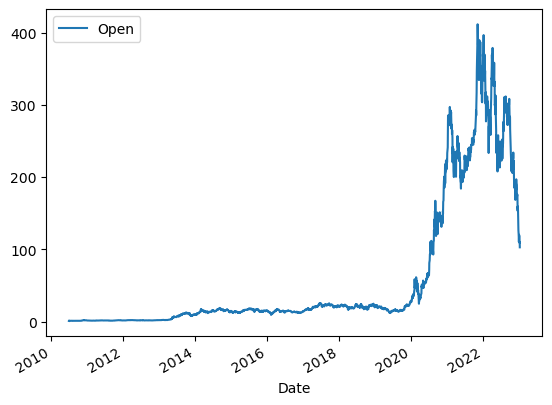

In [36]:
# API Yfinance for stocking trade market


import yfinance as yf
import pandas as pd


Tesla = yf.Ticker("TSLA")

tesla_info=Tesla.info
tesla_info['country']
tesla_info['sector']

share_price_data = Tesla.history(period="max")

share_price_data.reset_index(inplace=True)
share_price_data.head()

share_price_data.plot(x="Date", y="Open")

In [38]:
! pip install bs4
! pip  install html5lib
!pip install lxml
!pip install nbformat==4.2.0

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [5]:
# when you scrapp data where web site have only 1 table

import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

data  = requests.get(url).text

soup = BeautifulSoup(data, 'html5lib')



In [8]:
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)    

C:\Users\ll\AppData\Local\Temp\ipykernel_21108\588127528.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)
C:\Users\ll\AppData\Local\Temp\ipykernel_21108\588127528.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)
C:\Users\ll\AppData\Local\Temp\ipykernel_21108\588127528.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":

In [9]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


In [10]:
# or we can use

read_html_pandas_data = pd.read_html(url)
read_html_pandas_data = pd.read_html(str(soup))

netflix_dataframe = read_html_pandas_data[0]

netflix_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


In [41]:
# using webscrapping when you have multiple tables and you must specify 

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [13]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

html_data  = requests.get(url).text

soup=BeautifulSoup(html_data, 'html5lib')


# soup.find_all("tbody")[1]
    
# If you want to use the read_html function the table is located at index 1



tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
tables = soup.find_all('table')
table_index=0
for index, table in enumerate(tables):
    if ('Tesla Quarterly Revenue'in str(table)):
        table_index=index
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col!=[]):
        date =col[0].text
        revenue =col[1].text.replace("$", "").replace(",", "")
        tesla_revenue=tesla_revenue.append({'Date':date,'Revenue':revenue},ignore_index=True)
tesla_revenue



C:\Users\ll\AppData\Local\Temp\ipykernel_21108\3275808764.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue=tesla_revenue.append({'Date':date,'Revenue':revenue},ignore_index=True)
C:\Users\ll\AppData\Local\Temp\ipykernel_21108\3275808764.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue=tesla_revenue.append({'Date':date,'Revenue':revenue},ignore_index=True)
C:\Users\ll\AppData\Local\Temp\ipykernel_21108\3275808764.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue=tesla_revenue.append({'Date':date,'Revenue':revenue},ignore_index=True)
C:\Users\ll\AppData\Local\Temp\ipykernel_21108\3275808764.py:25: FutureWarning: The frame.append method is deprecated and will be removed from

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
5,2021-06-30,11958
6,2021-03-31,10389
7,2020-12-31,10744
8,2020-09-30,8771
9,2020-06-30,6036


In [67]:
# or you can choose simple way but if you have text data on website you must choose the method from up

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
table_MN = pd.read_html(url, match='Tesla Quarterly Revenue')


df = table_MN[0]
df.head()

,Tesla Quarterly Revenue(Millions of US $),Tesla Quarterly Revenue(Millions of US $).1
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


In [71]:

df.rename(columns = {'Tesla Quarterly Revenue(Millions of US $).1':'revenue'}, inplace = True)
df.rename(columns = {'Tesla Quarterly Revenue(Millions of US $)':'date'}, inplace = True)
df["revenue"] = df['revenue'].str.replace(',|\$',"")

df

C:\Users\ll\AppData\Local\Temp\ipykernel_21108\1727602553.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.



,date,revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
5,2021-06-30,11958
6,2021-03-31,10389
7,2020-12-31,10744
8,2020-09-30,8771
9,2020-06-30,6036
